# Simple Linear Regression

__Sem digressão matemática pois ja conheço o assunto__

In [1]:
#Importing Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

Downloading Data

In [11]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-12-04 13:11:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   288KB/s    in 0,2s    

2019-12-04 13:11:52 (288 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [2]:
#Reading the Data
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [58]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
#Explorando um pouco mais outras features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


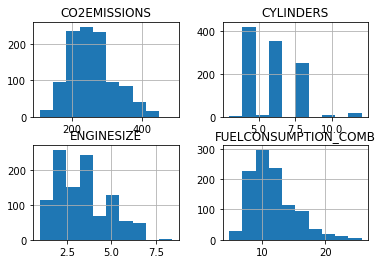

In [16]:
#Plot
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Vamos verificar a linearidade dessas features com as emissões de CO2

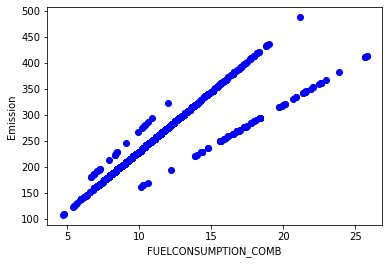

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

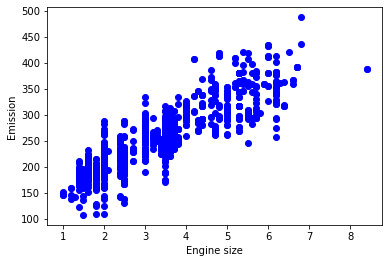

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

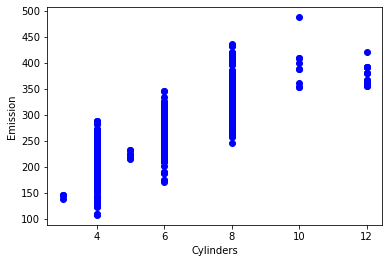

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

Dividindo o conjunto de dados em 80% Treino e 20% Teste; usando uma mascara para selecionar os dados aleatoriamente

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Regression Model

Uma Regressão Linear fit um modelo linear com os coeficientes $\theta = (\theta_1, ..., \theta_n)$ para minimizar  a "Soma Residual dos Quadrados" entre a variável independente $X$ e a variável dependente $Y$ através de uma aproximação linear

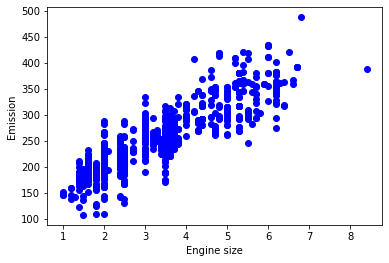

In [21]:
#Distribuição do conjunto de treino
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modeling

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [30]:
#.asanyarray Converte o input em um ndarray
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#Fit
regr.fit(train_x, train_y)

#Coeficientes
print("Coeficiente Angular: ", regr.coef_)
print("Coeficiente Linear: ", regr.intercept_)

Coeficiente Angular:  [[39.7870472]]
Coeficiente Linear:  [123.04336501]


Text(0, 0.5, 'Emission')

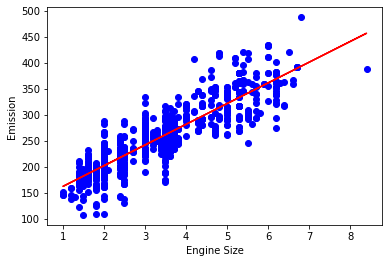

In [31]:
#Plot the Fit Line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.intercept_[0] + regr.coef_[0][0]*train_x, 'r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

## Evaluation

Há diversas metricas para se avaliar um modelo, utilizaremos o MSE para calcular a acurácia do modelo baseado no conjunto de test.

* Mean Absolute Error: É o valor absoluto dos erros, ou seja, apenas um erro médio
* Mean Square Error (MSE) : É uma metrica focada em erros grandes, pois para erros grandes o termo ao quadrado cresce exponencialmente
* Root Mean Square Error (RSME) : É a raiz quadrado do MSE
* R-Square: Não é uma métrica de erro, mas é usada para a acurácia do modelo.Esta métrica representa o quão perto os dados estão da linha de regressão ajustada, ou seja, quanto maior for o $R^2$ melhor os dados se ajustam ao modelo.Seu máximo é 1 e ainda pode haver valores negativos, pois o modelo pode ser arbitrariamente pior

In [32]:
from sklearn.metrics import r2_score

In [34]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat = regr.predict(test_x)

#Metricas
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual Sum of Squares (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

Mean Absolute Error: 25.38
Residual Sum of Squares (MSE): 1076.82
R2-score: 0.71


# Multiple Linear Regression

Dividindo novamente o dataset para não haver conflitos

In [3]:
df_mult = df.copy()

In [4]:
msk_mult = np.random.rand(len(df)) < 0.8
train_mult = df_mult[msk_mult]
test_mult = df_mult[~msk_mult]

In [5]:
#train_mult.head()

## Multiple Regression Model

Iremos agora utilizar diversas features do DataSet como variaveis independentes $X$ afim de determinar a variável dependente $Y$. _Tomando o cuidado de não acarretar em um overfiting_

In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train_mult[['CO2EMISSIONS']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.44643629 8.63091398 9.39104118]]


Métricas do modelo com o conjunto de treino

In [13]:
y_hat= regr.predict(train_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 553.43
Variance score: 0.86


Esses coeficientes são os _coeficientes angulares_ vistos anteriormente, porém aqui temos um para cara feature, ou seja, temo $ \theta_1, \theta_2,$ e $\theta_3$, tal conjunto não mais representa uma reta que irá _fitar_ os dados mas sim um hiperplano, pois agora temos mais features ou seja um vetor com mais dimensões.<br>
Scikit-Learn tenta resolver esse problema de varias incógnitas através de um método chamado de "Ordinary Last Square". Basicamente o _OLS_ tenta minizar a soma dos erros ao quadrado (SSE) ou o erro quadrado médio (MSE) entre a variável target $y$ e a nossa saída prevista pelo modelo $ŷ$, em todas as amostras do conjunto.<br>
Uma das formas com as quais o OLS pode encontrar tal solução é com modelos matematicos (ou algoritmos baseados neles) de otimização como o Gradient Descent, Stochastic Gradient Descent, Newton's Methods, etc...<br>
__OBS: Os métodos Gradient Descent e Stochastic Gradient Descent foram estudados em detalhes através do livro Python Machine Learning - Sebastian Raschka__

### Prediction

In [14]:
y_hat= regr.predict(test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test_mult[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 520.57
Variance score: 0.88


Tentando outras features para verificar se os resultados melhoram

In [15]:
#df_mult.head()

In [16]:
x = np.asanyarray(train_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train_mult[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.495516   8.32238816 5.98276132 3.14878116]]


In [17]:
y_hat_2= regr.predict(test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x_2 = np.asanyarray(test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_2 = np.asanyarray(test_mult[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat_2 - y_2) ** 2))
print('Variance score: %.2f' % regr.score(x_2, y_2))

Residual sum of squares: 520.31
Variance score: 0.88


Testando agora com todas as features numericas (excluindo as categóricas)

In [18]:
x = np.asanyarray(train_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 
                             'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
y = np.asanyarray(train_mult[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.38024648  8.54825853 -9.57186763 -2.80856977 15.97119703 -3.86652938]]


In [19]:
y_hat_2= regr.predict(test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 
                                  'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])

x_2 = np.asanyarray(test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 
                                'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])

y_2 = np.asanyarray(test_mult[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat_2 - y_2) ** 2))
print('Variance score: %.2f' % regr.score(x_2, y_2))

Residual sum of squares: 436.81
Variance score: 0.90


Para evitar o Overfiting:<br>
https://elitedatascience.com/overfitting-in-machine-learning